In [2]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample dataset
data = {
    'Age': [25, 32, 47, 51, 23, 42, 36, 28, 30, 45],
    'Annual Income (in $1000s)': [50, 60, 85, 45, 35, 95, 40, 75, 55, 65],
    'Gender': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],  # 0 = Male, 1 = Female
    'Purchased': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]  # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Binarize the dataset for Apriori (discretize into ranges for age and income)
df['Age_Young'] = df['Age'].apply(lambda x: 1 if x < 35 else 0)
df['Age_Middle'] = df['Age'].apply(lambda x: 1 if 35 <= x <= 50 else 0)
df['Age_Senior'] = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df['Income_Low'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if x < 50 else 0)
df['Income_Medium'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if 50 <= x <= 75 else 0)
df['Income_High'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if x > 75 else 0)

# Drop original columns
df = df.drop(['Age', 'Annual Income (in $1000s)'], axis=1)

# Rename 'Gender' and 'Purchased' for clarity
df = df.rename(columns={'Gender': 'Gender_Female', 'Purchased': 'Purchased_Yes'})

# Convert the dataset into a transactional format by ensuring all columns are binary
transaction_df = df.astype(bool)

# Step 2: Apply the Apriori Algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Step 3: Display Results
print("Frequent Itemsets:")
display(frequent_itemsets)

print("\nAssociation Rules:")
display(rules)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [3]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample dataset
data = {
    'Age': [25, 32, 47, 51, 23, 42, 36, 28, 30, 45],
    'Annual Income (in $1000s)': [50, 60, 85, 45, 35, 95, 40, 75, 55, 65],
    'Gender': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],  # 0 = Male, 1 = Female
    'Purchased': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]  # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Binarize the dataset for Apriori (discretize into ranges for age and income)
df['Age_Young'] = df['Age'].apply(lambda x: 1 if x < 35 else 0)
df['Age_Middle'] = df['Age'].apply(lambda x: 1 if 35 <= x <= 50 else 0)
df['Age_Senior'] = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df['Income_Low'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if x < 50 else 0)
df['Income_Medium'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if 50 <= x <= 75 else 0)
df['Income_High'] = df['Annual Income (in $1000s)'].apply(lambda x: 1 if x > 75 else 0)

# Drop original columns
df = df.drop(['Age', 'Annual Income (in $1000s)'], axis=1)

# Rename 'Gender' and 'Purchased' for clarity
df = df.rename(columns={'Gender': 'Gender_Female', 'Purchased': 'Purchased_Yes'})

# Convert the dataset into a transactional format by ensuring all columns are binary
transaction_df = df.astype(bool)

# Step 2: Apply the Apriori Algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Step 3: Display Results
print("Frequent Itemsets:")
display(frequent_itemsets)

print("\nAssociation Rules:")
display(rules)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered Data:
   Age  Annual Income (in $1000s)  Gender  Purchased  Cluster
0   25                         50       0          0        2
1   32                         60       1          1        1
2   47                         85       0          1        1
3   51                         45       0          0        0
4   23                         35       1          0        2
5   42                         95       1          1        1
6   36                         40       0          0        2
7   28                         75       1          1        1
8   30                         55       0          0        2
9   45                         65       1          1        1


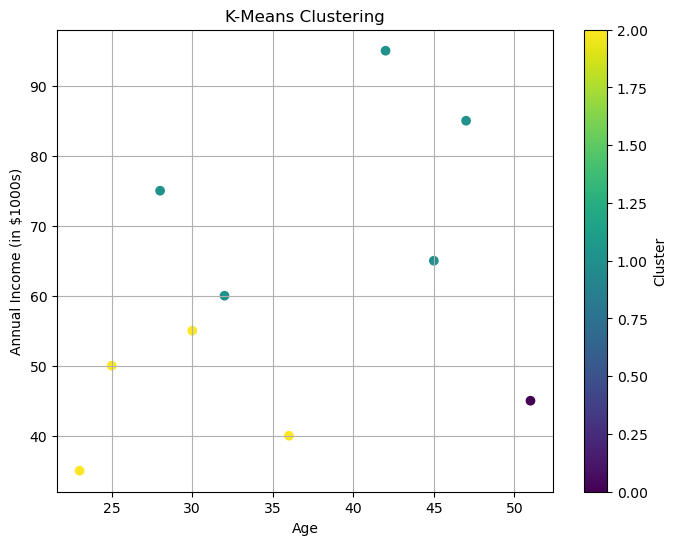

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Input dataset
data = {
    'Age': [25, 32, 47, 51, 23, 42, 36, 28, 30, 45],
    'Annual Income (in $1000s)': [50, 60, 85, 45, 35, 95, 40, 75, 55, 65],
    'Gender': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],  # 0 = Male, 1 = Female
    'Purchased': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]  # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Select features for clustering
features = df[['Age', 'Annual Income (in $1000s)', 'Gender', 'Purchased']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display clustered data
print("Clustered Data:")
print(df)

# Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (in $1000s)'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (in $1000s)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
